In [1]:
# loading packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [2]:
import os
os.chdir("C:\\Users\\Chandana\\Desktop\\Capstone project-ML")

In [3]:
#Loading Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# 1. Exploring Data Analysis

In [4]:
# loading dataset
Attrition=pd.read_excel('Student Applications & Performance.xlsx')
Attrition.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [5]:
Attrition.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [6]:
Attrition.shape

(3400, 56)

In [7]:
Attrition .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [8]:
# checking for NaN or infinite values
display(Attrition.isnull().any())

STUDENT IDENTIFIER          False
STDNT_AGE                   False
STDNT_GENDER                False
STDNT_BACKGROUND            False
IN_STATE_FLAG               False
INTERNATIONAL_STS           False
STDNT_MAJOR                 False
STDNT_MINOR                 False
STDNT_TEST_ENTRANCE1         True
STDNT_TEST_ENTRANCE2         True
STDNT_TEST_ENTRANCE_COMB     True
FIRST_TERM                  False
CORE_COURSE_NAME_1_F        False
CORE_COURSE_GRADE_1_F       False
CORE_COURSE_NAME_2_F         True
CORE_COURSE_GRADE_2_F        True
CORE_COURSE_NAME_3_F         True
CORE_COURSE_GRADE_3_F        True
CORE_COURSE_NAME_4_F         True
CORE_COURSE_GRADE_4_F        True
CORE_COURSE_NAME_5_F         True
CORE_COURSE_GRADE_5_F        True
CORE_COURSE_NAME_6_F         True
CORE_COURSE_GRADE_6_F        True
SECOND_TERM                 False
CORE_COURSE_NAME_1_S         True
CORE_COURSE_GRADE_1_S        True
CORE_COURSE_NAME_2_S         True
CORE_COURSE_GRADE_2_S        True
CORE_COURSE_NA

In [9]:
Attrition.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

There are lots of missing values, separarting each columns on the basis of having missing values and 
visualising it to get the extend of missing values each columns have in the attrition dataset

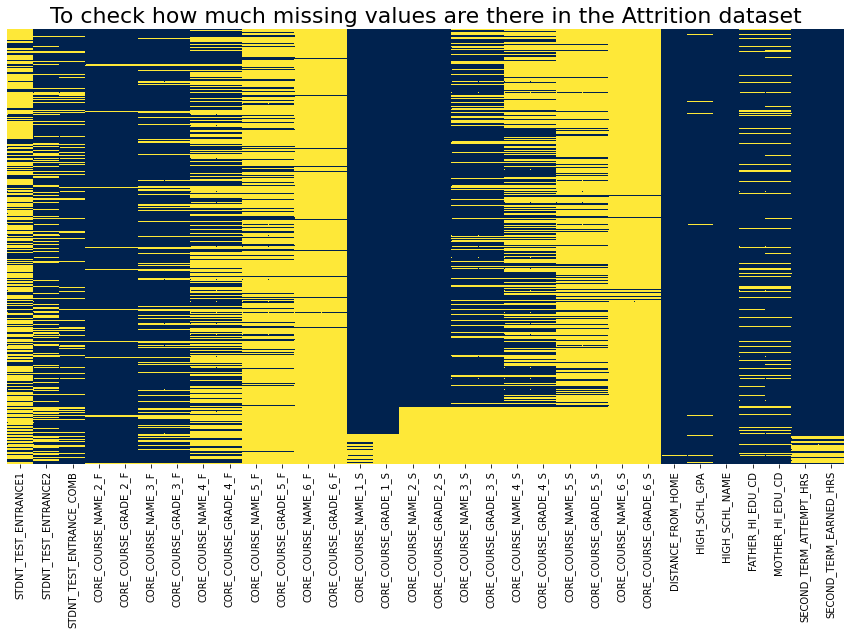

In [10]:
# Visualisation of missing data in each columns
col_having_null_value=Attrition.columns[Attrition.isnull().any()].tolist()
plt.figure(figsize=(15,8))
sns.heatmap(Attrition[col_having_null_value].isnull(),yticklabels=False,cbar=False,cmap='cividis')
plt.title('To check how much missing values are there in the Attrition dataset',
          fontdict={'fontsize':22})
plt.show()

#### Takeaway

The count of missing data ranges from high to low with some column's data are almost missing. On the other hand some columns showing missing values at the begining. It's not possible to analysis each columns one by one, 
so segregating attrition dataset into 3 small dataset based on their similar attributes

In [11]:
# dataset showing the financial backgroung of the Student
Financial_Indicators=Attrition[['STUDENT IDENTIFIER','FATHER_HI_EDU_CD','FATHER_HI_EDU_DESC','MOTHER_HI_EDU_CD',
                                'MOTHER_HI_EDU_DESC','GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED',
                                'RETURNED_2ND_YR']]

# dataset based on Student performance
Performance_Record=Attrition[['STUDENT IDENTIFIER','HIGH_SCHL_GPA','HIGH_SCHL_NAME','STDNT_MAJOR','STDNT_MINOR',
                              'STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB','DEGREE_GROUP_CD',
                              'DEGREE_GROUP_DESC','FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F',
                              'CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F',
                              'CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F',
                              'CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F','FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS',
                              'SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S','CORE_COURSE_NAME_2_S',
                              'CORE_COURSE_GRADE_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_4_S',
                              'CORE_COURSE_GRADE_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_6_S',
                              'CORE_COURSE_GRADE_6_S','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','RETURNED_2ND_YR']]

# Student demographic data
Student_Data=Attrition[['STUDENT IDENTIFIER','STDNT_AGE','STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','INTERNATIONAL_STS',
                        'HOUSING_STS','DISTANCE_FROM_HOME','RETURNED_2ND_YR']]

In [12]:
# Number of columns in each dataset
print('Financial_Indicators dataset has',Financial_Indicators.shape[1],'number of columns')
print('Performance_Record dataset has',Performance_Record.shape[1],'number of columns')
print('Student_Data dataset has',Student_Data.shape[1],'number of columns')

Financial_Indicators dataset has 10 number of columns
Performance_Record dataset has 41 number of columns
Student_Data dataset has 9 number of columns


# 1.1 Student_Data analysis

In [13]:
# checking Student_data
print(Student_Data.info())
Student_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT IDENTIFIER  3400 non-null   int64  
 1   STDNT_AGE           3400 non-null   int64  
 2   STDNT_GENDER        3400 non-null   object 
 3   STDNT_BACKGROUND    3400 non-null   object 
 4   IN_STATE_FLAG       3400 non-null   object 
 5   INTERNATIONAL_STS   3400 non-null   object 
 6   HOUSING_STS         3400 non-null   object 
 7   DISTANCE_FROM_HOME  3375 non-null   float64
 8   RETURNED_2ND_YR     3400 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 239.2+ KB
None


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,HOUSING_STS,DISTANCE_FROM_HOME,RETURNED_2ND_YR
0,7808615,18,F,BGD 1,Y,N,On Campus,150.0,0
1,7830063,19,F,BGD 1,N,N,Off Campus,69.0,1
2,7847538,18,M,BGD 1,Y,N,On Campus,150.0,1
3,8006429,18,M,BGD 1,Y,N,On Campus,150.0,1
4,7962680,18,F,BGD 1,Y,N,Off Campus,69.0,1


In [14]:
#checking for null values
Student_Data.isnull().sum()

STUDENT IDENTIFIER     0
STDNT_AGE              0
STDNT_GENDER           0
STDNT_BACKGROUND       0
IN_STATE_FLAG          0
INTERNATIONAL_STS      0
HOUSING_STS            0
DISTANCE_FROM_HOME    25
RETURNED_2ND_YR        0
dtype: int64

In [15]:
# check for unique values in categorical column
for i in Student_Data.columns[Student_Data.dtypes=='object']:
    print(i,':',Student_Data[i].unique())

STDNT_GENDER : ['F' 'M']
STDNT_BACKGROUND : ['BGD 1' 'BGD 3' 'BGD 6' 'BGD 4' 'BGD 8' 'BGD 2' 'BGD 7' 'BGD 5']
IN_STATE_FLAG : ['Y' 'N']
INTERNATIONAL_STS : ['N' 'Y']
HOUSING_STS : ['On Campus' 'Off Campus']


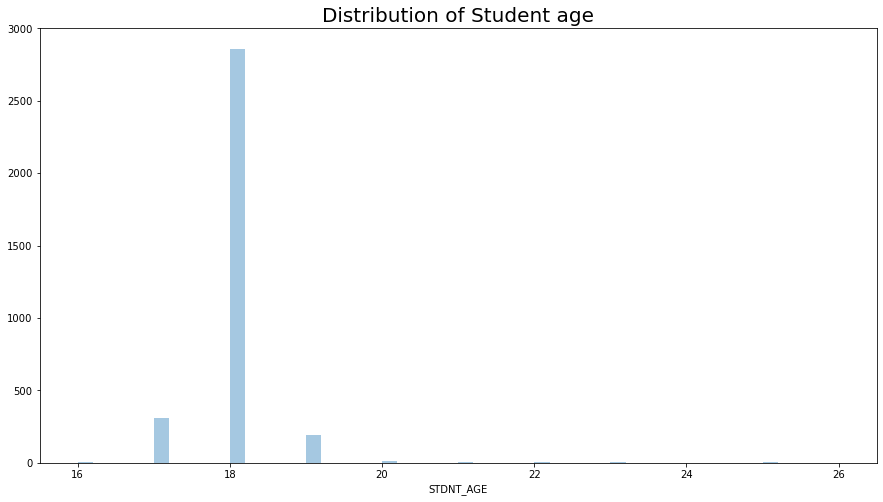

In [16]:
#  Visualisation of Age distribution among Student
plt.figure(figsize=(15,8))
sns.distplot(Student_Data['STDNT_AGE'],kde=False)
plt.title('Distribution of Student age',fontdict={'fontsize':20})
plt.show()

Student of age 18yrs are more in number

In [17]:
# Counting of student based on categorical variable

# STDNT_GENDER
print('Counting of student based on GENDER')
print(Student_Data['STDNT_GENDER'].value_counts(),'\n')

# STDNT_BACKGROUND
print('Counting of student based on BACKGROUND')
print(Student_Data['STDNT_BACKGROUND'].value_counts(),'\n')

# IN_STATE_FLAG
print('Counting of student based on NATIONALITY(belong to the same nation)')
print(Student_Data['IN_STATE_FLAG'].value_counts(),'\n')

# INTERNATIONAL_STS
print('INTERNATIONAL student counting')
print(Student_Data['INTERNATIONAL_STS'].value_counts(),'\n')

# HOUSING_STS
print('Whether the student living inside the campus or outside the campus')
print(Student_Data['HOUSING_STS'].value_counts(),'\n')

Counting of student based on GENDER
F    2140
M    1260
Name: STDNT_GENDER, dtype: int64 

Counting of student based on BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64 

Counting of student based on NATIONALITY(belong to the same nation)
Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64 

INTERNATIONAL student counting
N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64 

Whether the student living inside the campus or outside the campus
Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64 



In [18]:
# National as well as international student count on their campus preference, 
geo_stat0=pd.pivot_table(Student_Data,columns='HOUSING_STS',
                    index=['IN_STATE_FLAG','INTERNATIONAL_STS'],
                    values='STDNT_GENDER',
                    aggfunc=np.count_nonzero)

geo_stat0

HOUSING_STS                      Off Campus  On Campus
IN_STATE_FLAG INTERNATIONAL_STS                       
N             N                         226         84
              Y                          11         16
Y             N                        1744       1319

In [19]:
# In percentage
round(geo_stat0/3400*100,1)

HOUSING_STS                      Off Campus  On Campus
IN_STATE_FLAG INTERNATIONAL_STS                       
N             N                         6.6        2.5
              Y                         0.3        0.5
Y             N                        51.3       38.8

51% of the student are local who decide to live outside the campus and 39% are living inside the campus.
There are very less number of international student.

In [20]:
geo_stat0.iplot(kind='bar',xTitle='(In State Student, International Student)',
                title='Comparision between national and international student based on living preference')

#### Takeaway
It is clearly seen in each case, the majority of the student are living outside the campus

In [21]:
# Student house distance from university
Student_Data['DISTANCE_FROM_HOME'].describe()

count    3375.000000
mean       99.825185
std       235.196984
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [22]:
# Visualisation of student's home distance
Student_Data['DISTANCE_FROM_HOME'].iplot(kind='hist',bins=200,
                                         title="Distribution of student's home distance from university",
                                         xTitle='DISTANCE FROM HOME')

In [23]:
Student_Data[Student_Data['DISTANCE_FROM_HOME']==0].shape

(671, 9)

It is obvious that there are many student whose hometown are located in the same state as university. Therefore we are able to see many long bars lies between 0 to 500. There are many observation having 0 value
and it is impossible to have the hometown located exactly where university is.

Conclusion: drop the column

In [24]:
# National as well as international student count on their campus preference, and whether they returned for Second year
geo_stat1=pd.pivot_table(Student_Data,
                         columns=['RETURNED_2ND_YR','HOUSING_STS'],
                         index=['IN_STATE_FLAG','INTERNATIONAL_STS'],
                         values='STDNT_GENDER',
                         aggfunc=np.count_nonzero)
geo_stat1

RETURNED_2ND_YR                          0                    1          
HOUSING_STS                     Off Campus On Campus Off Campus On Campus
IN_STATE_FLAG INTERNATIONAL_STS                                          
N             N                         46        31        180        53
              Y                          5         7          6         9
Y             N                        338       296       1406      1023

In [138]:
# In percentage
round(geo_stat1/3400*100,2)

RETURNED_2ND_YR                          0                    1          
HOUSING_STS                     Off Campus On Campus Off Campus On Campus
IN_STATE_FLAG INTERNATIONAL_STS                                          
N             N                       1.35      0.91       5.29      1.56
              Y                       0.15      0.21       0.18      0.26
Y             N                       9.94      8.71      41.35     30.09

In [25]:
geo_stat1.iplot(kind='bar',xTitle='(In State Student, International Student)',
                title='Distribution based on NATIONALITY,CAMPUS PREFERENCE and whether they turned for SECOND YEAR')

Many student who are living outside the campus are more showing for Second year.

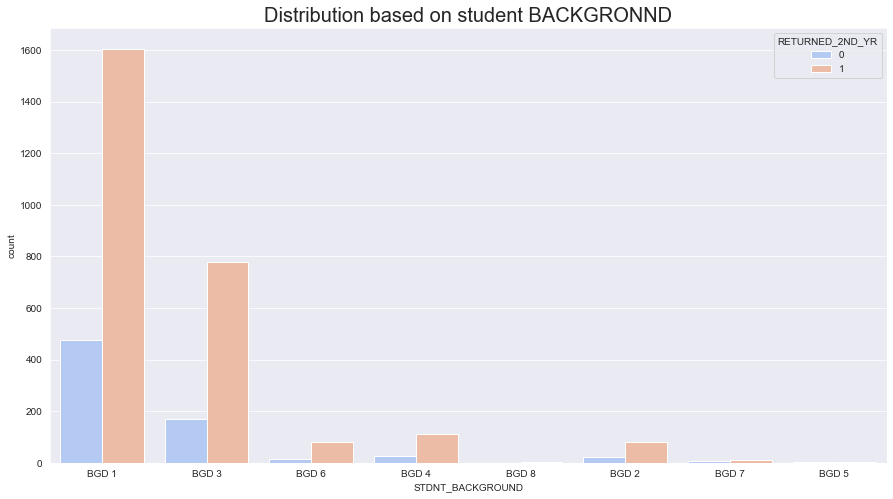

In [26]:
# Distribution based on student BACKGRONND
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(Student_Data['STDNT_BACKGROUND'],hue=Student_Data['RETURNED_2ND_YR'],palette='coolwarm')
plt.title('Distribution based on student BACKGRONND',fontdict={'fontsize':20})
plt.show()

In [27]:
# Cumulative percentage  
geo_stat2=pd.pivot_table(Student_Data,
               index='STDNT_BACKGROUND',
               columns='RETURNED_2ND_YR',
               values='STDNT_GENDER',
              aggfunc=np.count_nonzero)
geo_stat2.reset_index(inplace=True)
geo_stat2['Percentage of student not returned for second year']=round(geo_stat2[0].cumsum()/geo_stat2[0].sum()*100,2)
geo_stat2['Percentage of student returned for second year']=round(geo_stat2[1].cumsum()/geo_stat2[1].sum()*100,2)
geo_stat2

RETURNED_2ND_YR,STDNT_BACKGROUND,0,1,Percentage of student not returned for second year,Percentage of student returned for second year
0,BGD 1,477,1605,65.98,59.96
1,BGD 2,24,82,69.29,63.02
2,BGD 3,170,777,92.81,92.04
3,BGD 4,26,113,96.40,96.26
4,BGD 5,4,4,96.96,96.41
5,BGD 6,14,80,98.89,99.40
6,BGD 7,7,12,99.86,99.85
7,BGD 8,1,4,100.00,100.00


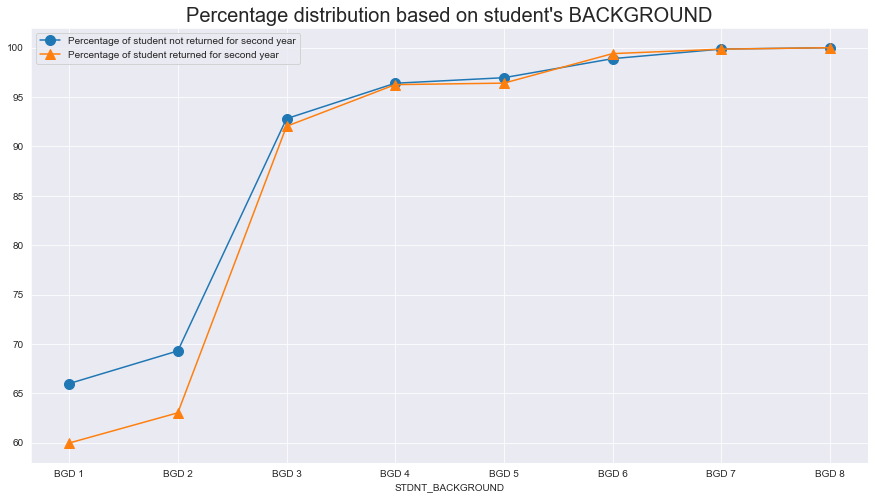

In [28]:
# Visualisation : Percentage distribution based on student's BACKGROUND
fig,axes=plt.subplots(figsize=(15,8))
geo_stat2.plot(x='STDNT_BACKGROUND',y='Percentage of student not returned for second year',ax=axes,marker='o',markersize=10)
geo_stat2.plot(x='STDNT_BACKGROUND',y='Percentage of student returned for second year',ax=axes,marker='^',markersize=10)
plt.title("Percentage distribution based on student's BACKGROUND",fontdict={'fontsize':20})
plt.show()

#### Takeaway

96% of the total student are from background 1,2,3 and 4.
Student showing for Second year are more from background 1,3,6,4 and 2

#### Some more visualisation

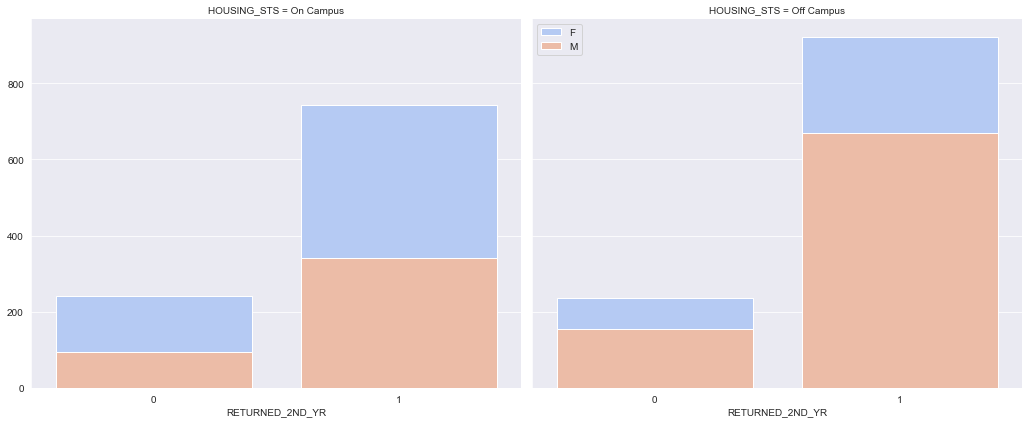

In [29]:
g=sns.FacetGrid(hue='STDNT_GENDER',col='HOUSING_STS',data=Student_Data,height=6,aspect=1.2,palette='coolwarm')
g.map(sns.countplot,'RETURNED_2ND_YR',order=[0,1])
plt.tight_layout
plt.legend()
plt.show()

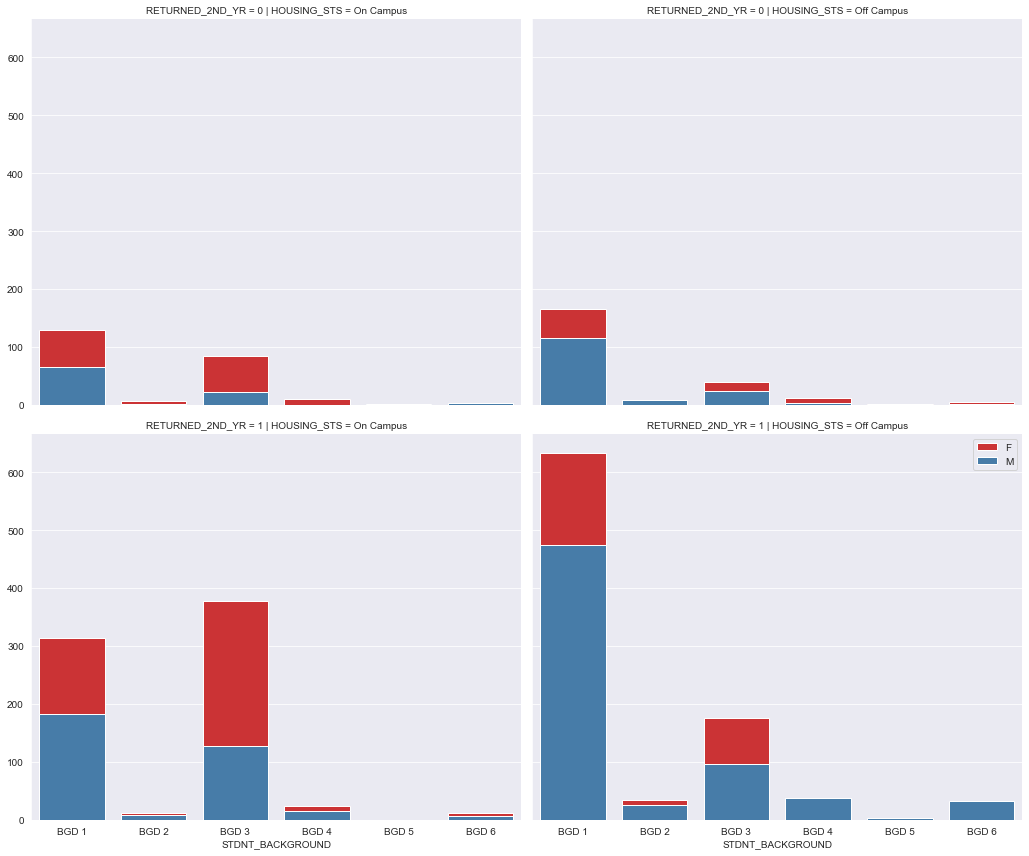

In [30]:
g=sns.FacetGrid(hue='STDNT_GENDER',
                col='HOUSING_STS',
                row='RETURNED_2ND_YR',
                data=Student_Data,
                height=6,
                aspect=1.2,
                palette='Set1')
g.map(sns.countplot,'STDNT_BACKGROUND',order=['BGD 1','BGD 2','BGD 3','BGD 4','BGD 5','BGD 6'])
plt.tight_layout
plt.legend()
plt.show()

In [31]:
Student_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT IDENTIFIER  3400 non-null   int64  
 1   STDNT_AGE           3400 non-null   int64  
 2   STDNT_GENDER        3400 non-null   object 
 3   STDNT_BACKGROUND    3400 non-null   object 
 4   IN_STATE_FLAG       3400 non-null   object 
 5   INTERNATIONAL_STS   3400 non-null   object 
 6   HOUSING_STS         3400 non-null   object 
 7   DISTANCE_FROM_HOME  3375 non-null   float64
 8   RETURNED_2ND_YR     3400 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 239.2+ KB


In [32]:
# Droping irrelevant columns from Student_Data dataset
# Note: Droping RETURNED_2ND_YR column is necessary because in further step, the small dataset will concate 
Student_Data.drop(['DISTANCE_FROM_HOME','RETURNED_2ND_YR'],axis=1,inplace=True)

In [33]:
# To confirm whether analysis was done properly
Student_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STUDENT IDENTIFIER  3400 non-null   int64 
 1   STDNT_AGE           3400 non-null   int64 
 2   STDNT_GENDER        3400 non-null   object
 3   STDNT_BACKGROUND    3400 non-null   object
 4   IN_STATE_FLAG       3400 non-null   object
 5   INTERNATIONAL_STS   3400 non-null   object
 6   HOUSING_STS         3400 non-null   object
dtypes: int64(2), object(5)
memory usage: 186.1+ KB


## 1.2 Performance_Record Analysis

In [34]:
# Checking Performance_Record column
print(Performance_Record.info())
Performance_Record.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   HIGH_SCHL_GPA             3347 non-null   float64
 2   HIGH_SCHL_NAME            3399 non-null   object 
 3   STDNT_MAJOR               3400 non-null   object 
 4   STDNT_MINOR               3400 non-null   object 
 5   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 6   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 7   STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 8   DEGREE_GROUP_CD           3400 non-null   object 
 9   DEGREE_GROUP_DESC         3400 non-null   object 
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3301 non-null   object 
 14  CORE_COU

,STUDENT IDENTIFIER,HIGH_SCHL_GPA,HIGH_SCHL_NAME,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,...,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,RETURNED_2ND_YR
0,7808615,4.00,SCHOOL 50,Undeclared,N,NaN,1150.0,1150.0,B,Bachelors,...,A,ITDS 2749,A,NaN,NaN,NaN,NaN,14.0,14.0,0
1,7830063,2.89,SCHOOL 389,Undeclared,N,26.0,NaN,1190.0,B,Bachelors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1
2,7847538,3.39,SCHOOL 82,Mathematics,N,NaN,1020.0,1030.0,B,Bachelors,...,A,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,1
3,8006429,2.93,SCHOOL 180,Undeclared,N,NaN,1210.0,1220.0,B,Bachelors,...,A,MUSC 1100,A,NaN,NaN,NaN,NaN,14.0,14.0,1
4,7962680,3.86,SCHOOL 2,Art,N,NaN,1200.0,1190.0,B,Bachelors,...,A,PSYC 1101,A,NaN,NaN,NaN,NaN,12.0,12.0,1


### Correlation of Features

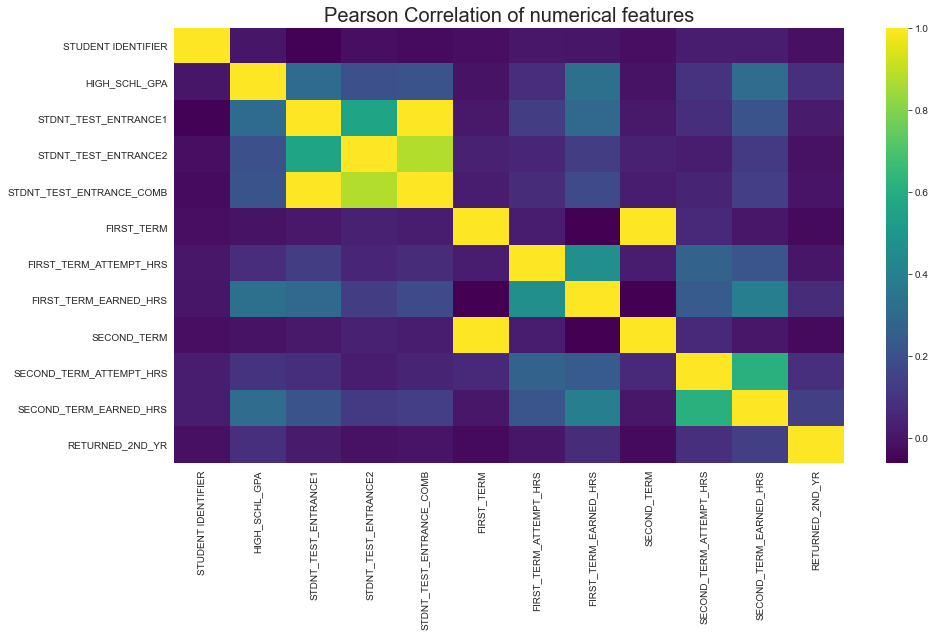

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(Performance_Record.corr(),cmap='viridis')
plt.title('Pearson Correlation of numerical features',fontdict={'fontsize':20})
plt.show()

Further analysis is required

In [36]:
# check for unique values in categorical column
for i in Performance_Record.columns[Performance_Record.dtypes=='object']:
    print(i,':',Performance_Record[i].unique())

HIGH_SCHL_NAME : ['SCHOOL 50' 'SCHOOL 389' 'SCHOOL 82' 'SCHOOL 180' 'SCHOOL 2' 'SCHOOL 5'
 'SCHOOL 130' 'SCHOOL 54' 'SCHOOL 189' 'SCHOOL 342' 'SCHOOL 11'
 'SCHOOL 28' 'SCHOOL 19' 'SCHOOL 98' 'SCHOOL 14' 'SCHOOL 121' 'SCHOOL 15'
 'SCHOOL 283' 'SCHOOL 304' 'SCHOOL 61' 'SCHOOL 229' 'SCHOOL 148'
 'SCHOOL 298' 'SCHOOL 175' 'SCHOOL 26' 'SCHOOL 88' 'SCHOOL 131'
 'SCHOOL 33' 'SCHOOL 128' 'SCHOOL 8' 'SCHOOL 223' 'SCHOOL 27' 'SCHOOL 52'
 'SCHOOL 29' 'SCHOOL 70' 'SCHOOL 20' 'SCHOOL 184' 'SCHOOL 453' 'SCHOOL 72'
 'SCHOOL 7' 'SCHOOL 25' 'SCHOOL 1' 'SCHOOL 18' 'SCHOOL 9' 'SCHOOL 216'
 'SCHOOL 10' 'SCHOOL 311' 'SCHOOL 34' 'SCHOOL 43' 'SCHOOL 45' 'SCHOOL 74'
 'SCHOOL 423' 'SCHOOL 132' 'SCHOOL 46' 'SCHOOL 47' 'SCHOOL 200'
 'SCHOOL 83' 'SCHOOL 292' 'SCHOOL 129' 'SCHOOL 66' 'SCHOOL 12'
 'SCHOOL 319' 'SCHOOL 3' 'SCHOOL 85' 'SCHOOL 49' 'SCHOOL 339' 'SCHOOL 23'
 'SCHOOL 111' 'SCHOOL 366' 'SCHOOL 440' 'SCHOOL 141' 'SCHOOL 13'
 'SCHOOL 48' 'SCHOOL 91' 'SCHOOL 22' 'SCHOOL 236' 'SCHOOL 263' 'SCHOOL 37'
 'SCHOOL

Lots of categorical variables are there. Need to analysis one by one

In [37]:
# Count of unique values
print('HIGH_SCHL_NAME :',Performance_Record['HIGH_SCHL_NAME'].nunique())
print('STDNT_MAJOR :',Performance_Record['STDNT_MAJOR'].nunique())
print('STDNT_MINOR :',Performance_Record['STDNT_MINOR'].nunique())

HIGH_SCHL_NAME : 439
STDNT_MAJOR : 54
STDNT_MINOR : 37


In [38]:
Performance_Record['HIGH_SCHL_NAME'].value_counts()
# It has a lot of unique values
# This column will not contribute much to our model, it's better to drop this column

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 404      1
SCHOOL 415      1
SCHOOL 90       1
SCHOOL 321      1
SCHOOL 490      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [39]:
Performance_Record['STDNT_MAJOR'].value_counts().head()
# 460 student's major course is undeclared and that count for 13% of the total Student
# will deal with this further

Undeclared                   460
Biology                      362
Early Childhood Education    190
Pre-Nursing                  177
Nursing                      164
Name: STDNT_MAJOR, dtype: int64

In [40]:
Performance_Record['STDNT_MINOR'].value_counts().head()
# 3160 have not opted for minor course
# This column will not yield fruitfull result if used for building model, therefore drop it

N                          3160
Spanish                      26
Music                        19
Psychology                   19
Foundations of Business      15
Name: STDNT_MINOR, dtype: int64

In [41]:
# Count of null values
print('No of Null values in STDNT_TEST_ENTRANCE1 :',Performance_Record['STDNT_TEST_ENTRANCE1'].isnull().sum())
print('No of Null values in STDNT_TEST_ENTRANCE2 :',Performance_Record['STDNT_TEST_ENTRANCE2'].isnull().sum())
print('No of Null values in STDNT_TEST_ENTRANCE_COMB :',Performance_Record['STDNT_TEST_ENTRANCE_COMB'].isnull().sum())

No of Null values in STDNT_TEST_ENTRANCE1 : 2294
No of Null values in STDNT_TEST_ENTRANCE2 : 908
No of Null values in STDNT_TEST_ENTRANCE_COMB : 518


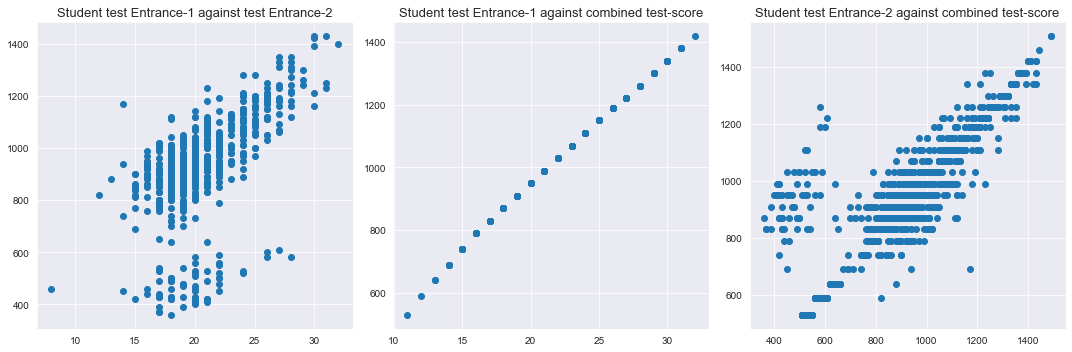

In [42]:
# Visualisation of Student test entrance performance
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=False,sharey=False)

axes[0].scatter(Performance_Record['STDNT_TEST_ENTRANCE1'],Performance_Record['STDNT_TEST_ENTRANCE2'])
axes[0].set_title('Student test Entrance-1 against test Entrance-2',fontdict={'fontsize':13})

axes[1].scatter(Performance_Record['STDNT_TEST_ENTRANCE1'],Performance_Record['STDNT_TEST_ENTRANCE_COMB'])
axes[1].set_title('Student test Entrance-1 against combined test-score',fontdict={'fontsize':13})

axes[2].scatter(Performance_Record['STDNT_TEST_ENTRANCE2'],Performance_Record['STDNT_TEST_ENTRANCE_COMB'])
axes[2].set_title('Student test Entrance-2 against combined test-score',fontdict={'fontsize':13})

plt.tight_layout()
plt.show()

In [43]:
# Filling the missing values in STDNT_TEST_ENTRANCE_COMB column
mean=round(Performance_Record['STDNT_TEST_ENTRANCE_COMB'].mean())
Performance_Record['STDNT_TEST_ENTRANCE_COMB'].fillna(mean,inplace=True)

Takeaway
Test entrance 1,2 and combined score are positively correlated. So keeping only the combined score

In [44]:
# Number of missing values in HIGH_SCHL_GPA column
print('Number of missing values in HIGH_SCHL_GPA column:',Performance_Record['HIGH_SCHL_GPA'].isnull().sum())

Number of missing values in HIGH_SCHL_GPA column: 53


In [45]:
print('Before dealing with missing values and outlier in HIGH_SCHL_GPA columns')
Performance_Record.iplot(kind='scatter',x='HIGH_SCHL_GPA',y='STDNT_TEST_ENTRANCE_COMB',mode='markers',
                        title='High School GPA against combined test Entrance score')

Before dealing with missing values and outlier in HIGH_SCHL_GPA columns


In [46]:
# Dealing with missing values and outlier in HIGH_SCHL_GPA columns

m0=round(Performance_Record[Performance_Record['STDNT_TEST_ENTRANCE_COMB']==910]['HIGH_SCHL_GPA'].mean(),1)
m1=round(Performance_Record[Performance_Record['STDNT_TEST_ENTRANCE_COMB']<=700]['HIGH_SCHL_GPA'].mean(),1)
m2=round(Performance_Record[(Performance_Record['STDNT_TEST_ENTRANCE_COMB']>700)&
                            (Performance_Record['STDNT_TEST_ENTRANCE_COMB']<=1300)]['HIGH_SCHL_GPA'].mean(),1)
m3=round(Performance_Record[Performance_Record['STDNT_TEST_ENTRANCE_COMB']>1300]['HIGH_SCHL_GPA'].mean(),1)


Performance_Record['HIGH_SCHL_GPA'].replace(0,m0,inplace=True)

i1=Performance_Record[(Performance_Record['STDNT_TEST_ENTRANCE_COMB']<=700)&
                      (Performance_Record['HIGH_SCHL_GPA'].isnull())].index.tolist()
Performance_Record.loc[i1,'HIGH_SCHL_GPA']=m1

i2=Performance_Record[(Performance_Record['STDNT_TEST_ENTRANCE_COMB']>700)&
                      (Performance_Record['STDNT_TEST_ENTRANCE_COMB']<=1300)&
                      (Performance_Record['HIGH_SCHL_GPA'].isnull())].index.tolist()
Performance_Record.loc[i2,'HIGH_SCHL_GPA']=m2

i3=Performance_Record[(Performance_Record['STDNT_TEST_ENTRANCE_COMB']>1300)&
                      (Performance_Record['HIGH_SCHL_GPA'].isnull())].index.tolist()
Performance_Record.loc[i3,'HIGH_SCHL_GPA']=m3

del([m0,m1,m2,m3,i1,i2,i3])

Performance_Record['HIGH_SCHL_GPA'].isnull().any()

False

In [47]:
print('After dealing with missing values in HIGH_SCHL_GPA columns')
Performance_Record.iplot(kind='scatter',x='HIGH_SCHL_GPA',y='STDNT_TEST_ENTRANCE_COMB',mode='markers',
                        title='High School GPA against combined test Entrance score')

After dealing with missing values in HIGH_SCHL_GPA columns


There are some student who have very less GPA but performs well in entrance exam and there are some student who shows quite the opposite behaviour. So after doing analysis it cannot to said with 100% confidence that only the high GPA student will perform well in test entrance

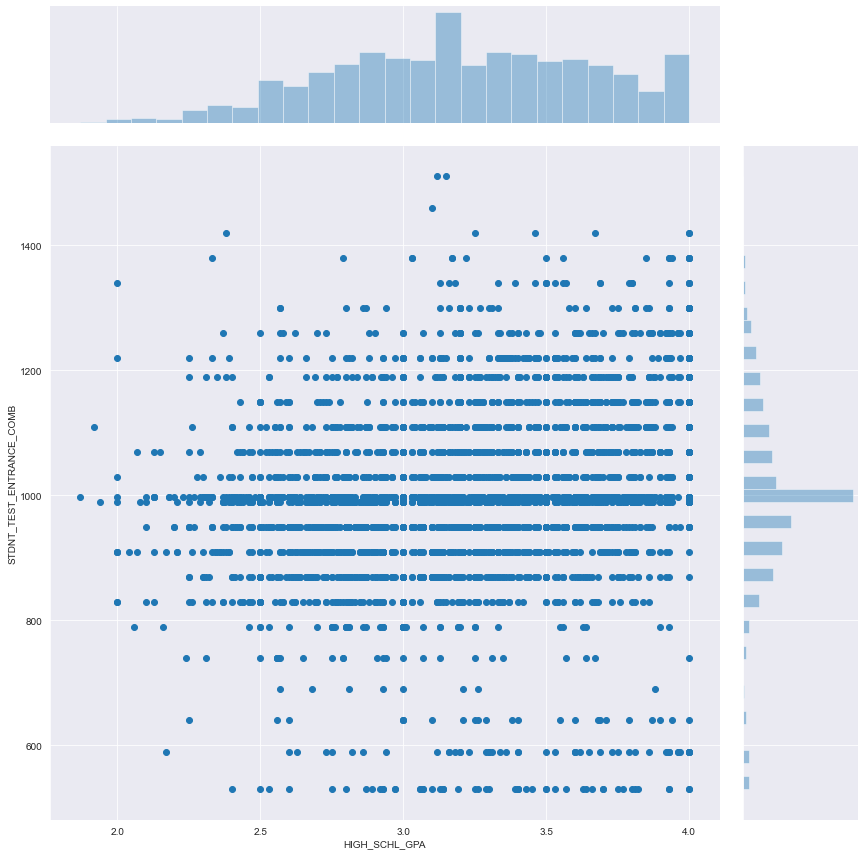

In [48]:
sns.jointplot(y=Performance_Record['STDNT_TEST_ENTRANCE_COMB'],x=Performance_Record['HIGH_SCHL_GPA'],height=12,ratio=5)
plt.show()

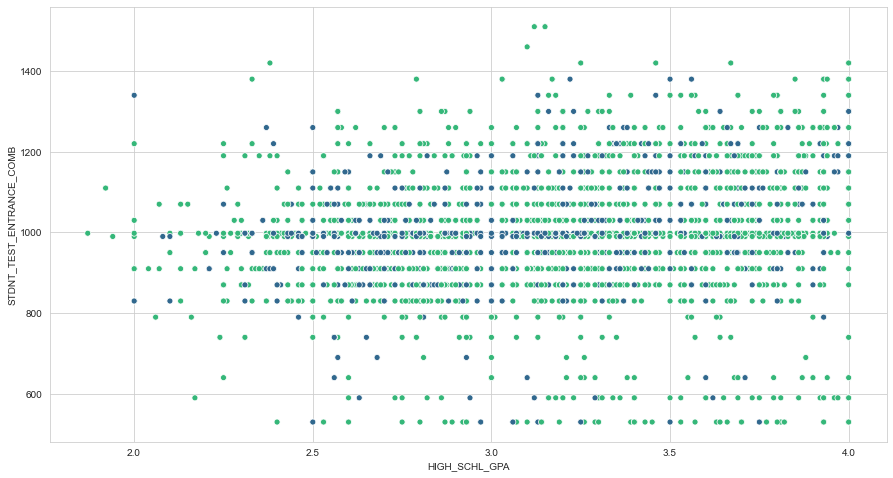

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
g=sns.scatterplot(x='HIGH_SCHL_GPA',y='STDNT_TEST_ENTRANCE_COMB',hue='RETURNED_2ND_YR',data=Performance_Record,
                palette='viridis',legend=False)
fig=g.get_figure()
fig.savefig('plot.png')
plt.show()

In [50]:
# Degree code for which student has enrolled in university
Performance_Record['DEGREE_GROUP_CD'].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [51]:
# Degree for which student has enrolled in university
Performance_Record['DEGREE_GROUP_DESC'].value_counts()

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

Since DEGREE_GROUP_CD and DEGREE_GROUP_DESC column are having the same thing, keeping any one of it

In [52]:
# Core course name and grade for First and Second Year unique values 
print('Count of unique values')
Performance_Record[['CORE_COURSE_NAME_1_F',
                    'CORE_COURSE_NAME_2_F',
                    'CORE_COURSE_NAME_3_F',
                    'CORE_COURSE_NAME_4_F',
                    'CORE_COURSE_NAME_5_F',
                    'CORE_COURSE_NAME_6_F',
                    'CORE_COURSE_NAME_1_S',
                    'CORE_COURSE_NAME_2_S',
                    'CORE_COURSE_NAME_3_S',
                    'CORE_COURSE_NAME_4_S',
                    'CORE_COURSE_NAME_5_S',
                    'CORE_COURSE_NAME_6_S',
                    'CORE_COURSE_GRADE_1_F',
                    'CORE_COURSE_GRADE_2_F',
                    'CORE_COURSE_GRADE_3_F',
                    'CORE_COURSE_GRADE_4_F',
                    'CORE_COURSE_GRADE_5_F',
                    'CORE_COURSE_GRADE_6_F',
                    'CORE_COURSE_GRADE_1_S',
                    'CORE_COURSE_GRADE_2_S',
                    'CORE_COURSE_GRADE_3_S',
                    'CORE_COURSE_GRADE_4_S',
                    'CORE_COURSE_GRADE_5_S',
                    'CORE_COURSE_GRADE_6_S']].nunique()

Count of unique values


CORE_COURSE_NAME_1_F     69
CORE_COURSE_NAME_2_F     74
CORE_COURSE_NAME_3_F     74
CORE_COURSE_NAME_4_F     68
CORE_COURSE_NAME_5_F     53
CORE_COURSE_NAME_6_F     24
CORE_COURSE_NAME_1_S     66
CORE_COURSE_NAME_2_S     69
CORE_COURSE_NAME_3_S     68
CORE_COURSE_NAME_4_S     64
CORE_COURSE_NAME_5_S     51
CORE_COURSE_NAME_6_S     26
CORE_COURSE_GRADE_1_F     7
CORE_COURSE_GRADE_2_F     7
CORE_COURSE_GRADE_3_F     6
CORE_COURSE_GRADE_4_F     6
CORE_COURSE_GRADE_5_F     4
CORE_COURSE_GRADE_6_F     4
CORE_COURSE_GRADE_1_S     8
CORE_COURSE_GRADE_2_S     6
CORE_COURSE_GRADE_3_S     6
CORE_COURSE_GRADE_4_S     5
CORE_COURSE_GRADE_5_S     5
CORE_COURSE_GRADE_6_S     3
dtype: int64

In [53]:
# List of unique values of grade for First and Second year
print('List of unique values','\n')
print('CORE_COURSE_GRADE_1_F :',Performance_Record['CORE_COURSE_GRADE_1_F'].unique())
print('CORE_COURSE_GRADE_2_F :',Performance_Record['CORE_COURSE_GRADE_2_F'].unique())
print('CORE_COURSE_GRADE_3_F :',Performance_Record['CORE_COURSE_GRADE_3_F'].unique())
print('CORE_COURSE_GRADE_4_F :',Performance_Record['CORE_COURSE_GRADE_4_F'].unique())
print('CORE_COURSE_GRADE_5_F :',Performance_Record['CORE_COURSE_GRADE_5_F'].unique())
print('CORE_COURSE_GRADE_6_F :',Performance_Record['CORE_COURSE_GRADE_6_F'].unique())
print('CORE_COURSE_GRADE_1_S :',Performance_Record['CORE_COURSE_GRADE_1_S'].unique())
print('CORE_COURSE_GRADE_2_S :',Performance_Record['CORE_COURSE_GRADE_2_S'].unique())
print('CORE_COURSE_GRADE_3_S :',Performance_Record['CORE_COURSE_GRADE_3_S'].unique())
print('CORE_COURSE_GRADE_4_S :',Performance_Record['CORE_COURSE_GRADE_4_S'].unique())
print('CORE_COURSE_GRADE_5_S :',Performance_Record['CORE_COURSE_GRADE_5_S'].unique())
print('CORE_COURSE_GRADE_6_S :',Performance_Record['CORE_COURSE_GRADE_6_S'].unique())

List of unique values 

CORE_COURSE_GRADE_1_F : ['A' 'B' 'C' 'NOT REP' 'D' 'F' 'INCOMPL']
CORE_COURSE_GRADE_2_F : ['A' 'B' 'C' 'D' 'F' nan 'NOT REP' 'INCOMPL']
CORE_COURSE_GRADE_3_F : ['A' nan 'B' 'C' 'D' 'F' 'INCOMPL']
CORE_COURSE_GRADE_4_F : ['A' nan 'B' 'C' 'D' 'F' 'INCOMPL']
CORE_COURSE_GRADE_5_F : [nan 'A' 'B' 'C' 'D']
CORE_COURSE_GRADE_6_F : [nan 'A' 'B' 'C' 'D']
CORE_COURSE_GRADE_1_S : ['A' 'B' 'C' 'D' 'F' 'NOT REP' 'INCOMPL' 'Unknown' nan]
CORE_COURSE_GRADE_2_S : ['A' 'B' 'C' 'D' 'F' 'INCOMPL' nan]
CORE_COURSE_GRADE_3_S : ['A' nan 'B' 'C' 'D' 'F' 'INCOMPL']
CORE_COURSE_GRADE_4_S : ['A' nan 'B' 'C' 'D' 'F']
CORE_COURSE_GRADE_5_S : [nan 'A' 'B' 'C' 'D' 'F']
CORE_COURSE_GRADE_6_S : [nan 'A' 'B' 'C']


Drop all these column as the conclusion can be drawn from FIRST_TERM_EARNED_HRS and SECOND_TERM_EARNED_HRS columns

In [54]:
# Firt Term and Second Term
print(Performance_Record['FIRST_TERM'].value_counts(),'\n')
print(Performance_Record['SECOND_TERM'].value_counts())

200908    676
201008    632
200808    581
200708    521
200608    497
200508    493
Name: FIRST_TERM, dtype: int64 

201002    676
201102    632
200902    581
200802    521
200702    497
200602    493
Name: SECOND_TERM, dtype: int64


Column FIRST_TERM and SECOND_TERM contains only the semester code, therefore drop both of it

In [55]:
# List of unique values of FIRST_TERM_ATTEMPT_HRS and FIRST_TERM_EARNED_HRS 
print('List of unique values','\n')
print('FIRST_TERM_ATTEMPT_HRS :',Performance_Record['FIRST_TERM_ATTEMPT_HRS'].unique())
print('FIRST_TERM_EARNED_HRS :',Performance_Record['FIRST_TERM_EARNED_HRS'].unique())

List of unique values 

FIRST_TERM_ATTEMPT_HRS : [16 18 15 13 12 17 14 19 20 21  9 11]
FIRST_TERM_EARNED_HRS : [16 18 15 13 12 17 14 10  9 11  8  7  6 19 21  0  2  4  3  5 20  1]


In [56]:
# List of unique values of SECOND_TERM_ATTEMPT_HRS and SECOND_TERM_EARNED_HRS
print('List of unique values in','\n')
print('SECOND_TERM_ATTEMPT_HRS :',Performance_Record['SECOND_TERM_ATTEMPT_HRS'].unique())
print('SECOND_TERM_EARNED_HRS :',Performance_Record['SECOND_TERM_EARNED_HRS'].unique())

List of unique values in 

SECOND_TERM_ATTEMPT_HRS : [14. 18. 12. 16. 15. 13. 17.  7. 19.  9.  6. 21. 20. 11. 23. 10. 22.  8.
  4. nan  3.  2.]
SECOND_TERM_EARNED_HRS : [14. 18. 12. 16. 15. 13. 17.  7. 19.  8.  9. 10. 11.  6. 21. 20. 23. nan
  3.  5.  4.  0.  2.  1.]


In [57]:
# Null values count of SECOND_TERM_ATTEMPT_HRS and SECOND_TERM_EARNED_HRS columns
print('Count of null value in SECOND_TERM_ATTEMPT_HRS :',Performance_Record['SECOND_TERM_ATTEMPT_HRS'].isnull().sum())
print('Count of null value in SECOND_TERM_EARNED_HRS :',Performance_Record['SECOND_TERM_EARNED_HRS'].isnull().sum())

Count of null value in SECOND_TERM_ATTEMPT_HRS : 206
Count of null value in SECOND_TERM_EARNED_HRS : 209


In [58]:
# checking whether both the column are having the same null observation
Performance_Record[(Performance_Record['SECOND_TERM_ATTEMPT_HRS'].isnull())&
                   (Performance_Record['SECOND_TERM_EARNED_HRS'].isnull())].shape

(206, 41)

Conclusion can be drawn from FIRST_TERM_EARNED_HRS and SECOND_TERM_EARNED_HRS columns, will analysis further

In [59]:
Performance_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   HIGH_SCHL_GPA             3400 non-null   float64
 2   HIGH_SCHL_NAME            3399 non-null   object 
 3   STDNT_MAJOR               3400 non-null   object 
 4   STDNT_MINOR               3400 non-null   object 
 5   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 6   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 7   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 8   DEGREE_GROUP_CD           3400 non-null   object 
 9   DEGREE_GROUP_DESC         3400 non-null   object 
 10  FIRST_TERM                3400 non-null   int64  
 11  CORE_COURSE_NAME_1_F      3400 non-null   object 
 12  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 13  CORE_COURSE_NAME_2_F      3301 non-null   object 
 14  CORE_COU

In [60]:
Performance_Record.drop(['HIGH_SCHL_NAME',
                         'STDNT_MINOR',
                         'DEGREE_GROUP_CD',
                         'STDNT_TEST_ENTRANCE1',
                         'STDNT_TEST_ENTRANCE2',
                         'FIRST_TERM',
                         'SECOND_TERM',
                         'CORE_COURSE_GRADE_1_F',
                         'CORE_COURSE_GRADE_2_F',
                         'CORE_COURSE_GRADE_3_F',
                         'CORE_COURSE_GRADE_4_F',
                         'CORE_COURSE_GRADE_5_F',
                         'CORE_COURSE_GRADE_6_F',
                         'CORE_COURSE_GRADE_1_S',
                         'CORE_COURSE_GRADE_2_S',
                         'CORE_COURSE_GRADE_3_S',
                         'CORE_COURSE_GRADE_4_S',
                         'CORE_COURSE_GRADE_5_S',
                         'CORE_COURSE_GRADE_6_S',
                         'CORE_COURSE_NAME_1_F',
                         'CORE_COURSE_NAME_2_F',
                         'CORE_COURSE_NAME_3_F',
                         'CORE_COURSE_NAME_4_F',
                         'CORE_COURSE_NAME_5_F',
                         'CORE_COURSE_NAME_6_F',
                         'CORE_COURSE_NAME_1_S',
                         'CORE_COURSE_NAME_2_S',
                         'CORE_COURSE_NAME_3_S',
                         'CORE_COURSE_NAME_4_S',
                         'CORE_COURSE_NAME_5_S',
                         'CORE_COURSE_NAME_6_S'],axis=1,inplace=True)

In [61]:
Performance_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   HIGH_SCHL_GPA             3400 non-null   float64
 2   STDNT_MAJOR               3400 non-null   object 
 3   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 4   DEGREE_GROUP_DESC         3400 non-null   object 
 5   FIRST_TERM_ATTEMPT_HRS    3400 non-null   int64  
 6   FIRST_TERM_EARNED_HRS     3400 non-null   int64  
 7   SECOND_TERM_ATTEMPT_HRS   3194 non-null   float64
 8   SECOND_TERM_EARNED_HRS    3191 non-null   float64
 9   RETURNED_2ND_YR           3400 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 265.8+ KB


#### Some more visualisation

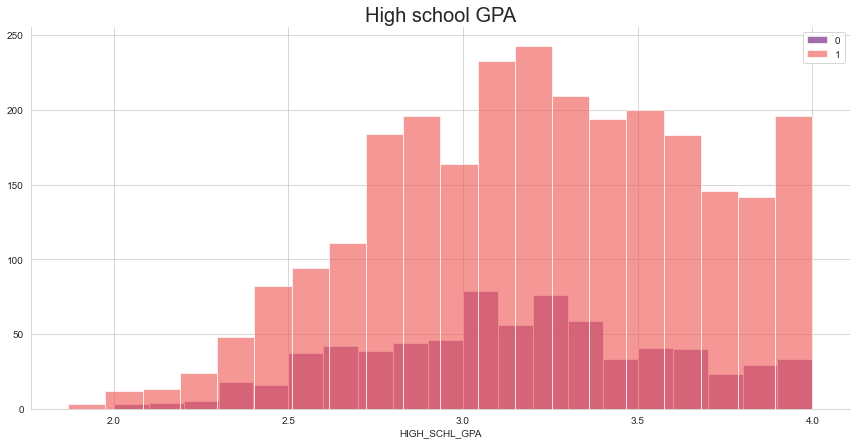

In [62]:
sns.FacetGrid(data=Performance_Record,hue='RETURNED_2ND_YR',
              height=6,aspect=2,palette='magma').map(plt.hist,'HIGH_SCHL_GPA',bins=20,alpha=0.65)
plt.title('High school GPA',fontdict={'fontsize':20})
plt.legend()
plt.show()

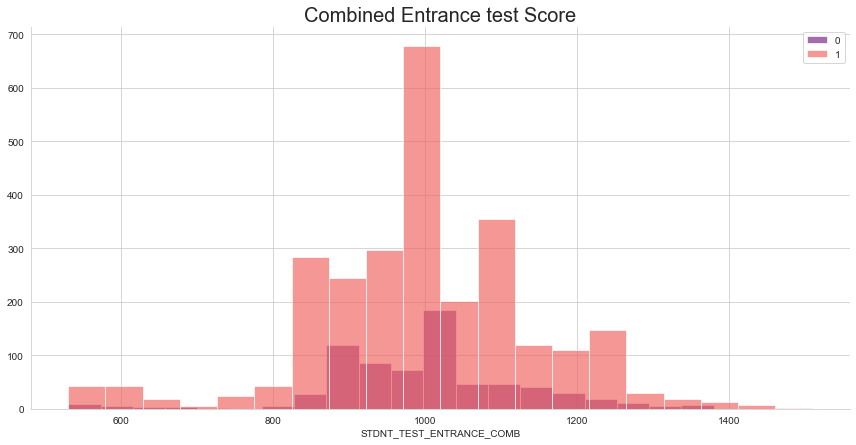

In [63]:
sns.FacetGrid(data=Performance_Record,hue='RETURNED_2ND_YR',
              height=6,aspect=2,palette='magma').map(plt.hist,'STDNT_TEST_ENTRANCE_COMB',bins=20,alpha=0.65)
plt.title('Combined Entrance test Score',fontdict={'fontsize':20})
plt.legend()
plt.show()

In [64]:
Performance_Record.drop(['STUDENT IDENTIFIER','RETURNED_2ND_YR'],axis=1,inplace=True)

In [65]:
Performance_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HIGH_SCHL_GPA             3400 non-null   float64
 1   STDNT_MAJOR               3400 non-null   object 
 2   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 3   DEGREE_GROUP_DESC         3400 non-null   object 
 4   FIRST_TERM_ATTEMPT_HRS    3400 non-null   int64  
 5   FIRST_TERM_EARNED_HRS     3400 non-null   int64  
 6   SECOND_TERM_ATTEMPT_HRS   3194 non-null   float64
 7   SECOND_TERM_EARNED_HRS    3191 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 212.6+ KB


## 1.3 Financial_Indicators Analysis

In [66]:
# Checking Financial_Indicators column
print(Financial_Indicators.info())
Financial_Indicators.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   STUDENT IDENTIFIER    3400 non-null   int64  
 1   FATHER_HI_EDU_CD      2968 non-null   float64
 2   FATHER_HI_EDU_DESC    3400 non-null   object 
 3   MOTHER_HI_EDU_CD      2911 non-null   float64
 4   MOTHER_HI_EDU_DESC    3400 non-null   object 
 5   GROSS_FIN_NEED        3400 non-null   int64  
 6   COST_OF_ATTEND        3400 non-null   int64  
 7   EST_FAM_CONTRIBUTION  3400 non-null   int64  
 8   UNMET_NEED            3400 non-null   float64
 9   RETURNED_2ND_YR       3400 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 265.8+ KB
None


,STUDENT IDENTIFIER,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,7808615,NaN,No Information,NaN,No Information,0,0,0,0.0,0
1,7830063,3.0,College/Beyond,3.0,College/Beyond,570000,1355760,785760,459300.0,1
2,7847538,2.0,High School,4.0,Other/Unknown,0,0,0,0.0,1
3,8006429,3.0,College/Beyond,3.0,College/Beyond,0,0,0,0.0,1
4,7962680,3.0,College/Beyond,2.0,High School,835920,1355760,519840,278340.0,1


In [67]:
# Checking for missing values
Financial_Indicators.isnull().sum()

STUDENT IDENTIFIER        0
FATHER_HI_EDU_CD        432
FATHER_HI_EDU_DESC        0
MOTHER_HI_EDU_CD        489
MOTHER_HI_EDU_DESC        0
GROSS_FIN_NEED            0
COST_OF_ATTEND            0
EST_FAM_CONTRIBUTION      0
UNMET_NEED                0
RETURNED_2ND_YR           0
dtype: int64

In [68]:
# check for unique values in categorical column
for i in Financial_Indicators.columns[Financial_Indicators.dtypes=='object']:
    print(i,':',Financial_Indicators[i].unique())

FATHER_HI_EDU_DESC : ['No Information' 'College/Beyond' 'High School'
 'Middle School/Junior High' 'Other/Unknown']
MOTHER_HI_EDU_DESC : ['No Information' 'College/Beyond' 'Other/Unknown' 'High School'
 'Middle School/Junior High']


In [69]:
# Father's educational status 
Financial_Indicators['FATHER_HI_EDU_DESC'].value_counts()

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [70]:
# Father's educational status code
Financial_Indicators['FATHER_HI_EDU_CD'].value_counts()

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64

Since FATHER_HI_EDU_CD and FATHER_HI_EDU_DESC column are having the same thing, keeping any one of it

In [71]:
# Mother's educational status 
Financial_Indicators['MOTHER_HI_EDU_DESC'].value_counts()

College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [72]:
# Mother's educational status code
Financial_Indicators['MOTHER_HI_EDU_CD'].value_counts()

3.0    1500
2.0    1223
4.0     117
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64

Since MOTHER_HI_EDU_CD and MOTHER_HI_EDU_DESC column are having the same thing, keeping any one of it

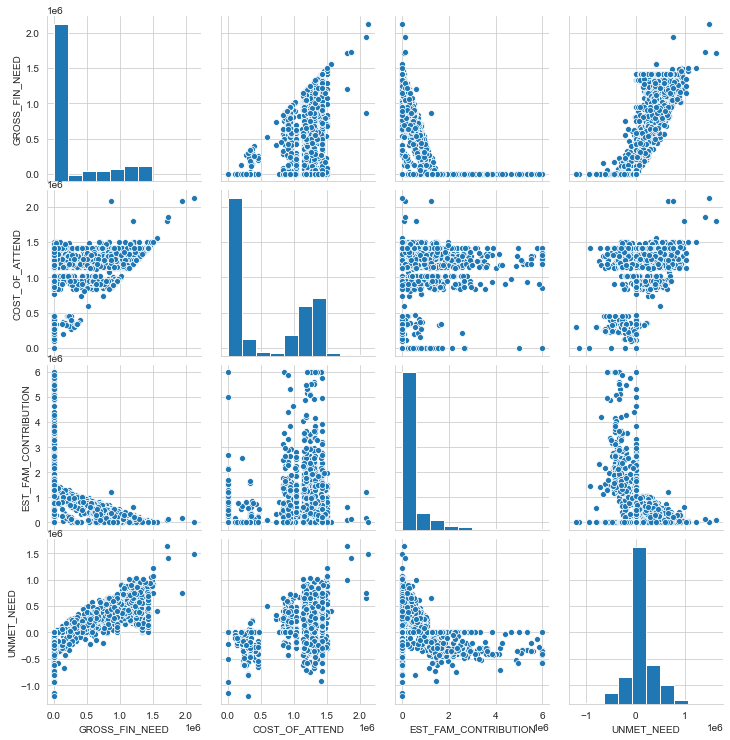

In [73]:
# Visualisation of GROSS_FIN_NEED, COST_OF_ATTEND, EST_FAM_CONTRIBUTION and UNMET_NEED columns data
data=Financial_Indicators[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED']]
sns.pairplot(data,palette='Reds')
plt.show()

#### Takeaway

In each column 0 values are more than 50%
There are negative values in UNMET_NEED column
UNMET_NEED and GROSS_FIN_NEED are showing the same trend
As financial need increases the family contribution decreases.
On the other hand, opposite behaviour can be seen in course fee against financial need

In [74]:
# Course Fees
Financial_Indicators[Financial_Indicators['COST_OF_ATTEND']==0].shape

(1679, 10)

In [75]:
# Estimated Family contribution towards course fees
Financial_Indicators[Financial_Indicators['EST_FAM_CONTRIBUTION']==0].shape

(2112, 10)

In [76]:
# Unmet financial need of the student
Financial_Indicators[Financial_Indicators['UNMET_NEED']==0].shape

(1805, 10)

In [77]:
# Financial need of Student
Financial_Indicators[Financial_Indicators['GROSS_FIN_NEED']==0].shape

(2237, 10)

In [78]:
# Checking how many observation are there where all the 4 columns are having 0 values
Financial_Indicators[(Financial_Indicators['EST_FAM_CONTRIBUTION']==0)&(Financial_Indicators['UNMET_NEED']==0)&
                 (Financial_Indicators['COST_OF_ATTEND']==0)&(Financial_Indicators['GROSS_FIN_NEED']==0)].shape

(1610, 10)

In [79]:
Financial_Indicators.drop(['STUDENT IDENTIFIER',
                        'FATHER_HI_EDU_CD',
                        'MOTHER_HI_EDU_CD'],axis=1,inplace=True)

In [80]:
Financial_Indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FATHER_HI_EDU_DESC    3400 non-null   object 
 1   MOTHER_HI_EDU_DESC    3400 non-null   object 
 2   GROSS_FIN_NEED        3400 non-null   int64  
 3   COST_OF_ATTEND        3400 non-null   int64  
 4   EST_FAM_CONTRIBUTION  3400 non-null   int64  
 5   UNMET_NEED            3400 non-null   float64
 6   RETURNED_2ND_YR       3400 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 186.1+ KB


### 1.4 Concatenation of Data

In [81]:
# conctenating all 4 daatset
attrition_1=pd.concat([Performance_Record,Student_Data,Financial_Indicators],axis=1)

In [82]:
attrition_1.columns

Index(['HIGH_SCHL_GPA', 'STDNT_MAJOR', 'STDNT_TEST_ENTRANCE_COMB',
       'DEGREE_GROUP_DESC', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
       'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS',
       'STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'HOUSING_STS',
       'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'GROSS_FIN_NEED',
       'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED',
       'RETURNED_2ND_YR'],
      dtype='object')

In [83]:
# Rearranging columns
attrition_1=attrition_1[[
                         'STDNT_AGE',
                         'STDNT_GENDER',
                         'STDNT_BACKGROUND',
                         'IN_STATE_FLAG',
                         'INTERNATIONAL_STS',
                         'HOUSING_STS',
                         'HIGH_SCHL_GPA',
                         'STDNT_TEST_ENTRANCE_COMB',
                         'DEGREE_GROUP_DESC',
                         'STDNT_MAJOR',
                         'FIRST_TERM_ATTEMPT_HRS',
                         'FIRST_TERM_EARNED_HRS',
                         'SECOND_TERM_ATTEMPT_HRS',
                         'SECOND_TERM_EARNED_HRS',
                         'FATHER_HI_EDU_DESC',
                         'MOTHER_HI_EDU_DESC',
                         'GROSS_FIN_NEED',
                         'COST_OF_ATTEND',
                         'UNMET_NEED',
                         'EST_FAM_CONTRIBUTION',
                         'RETURNED_2ND_YR'
                                            ]]

In [84]:
attrition_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3400 non-null   int64  
 1   STDNT_GENDER              3400 non-null   object 
 2   STDNT_BACKGROUND          3400 non-null   object 
 3   IN_STATE_FLAG             3400 non-null   object 
 4   INTERNATIONAL_STS         3400 non-null   object 
 5   HOUSING_STS               3400 non-null   object 
 6   HIGH_SCHL_GPA             3400 non-null   float64
 7   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 8   DEGREE_GROUP_DESC         3400 non-null   object 
 9   STDNT_MAJOR               3400 non-null   object 
 10  FIRST_TERM_ATTEMPT_HRS    3400 non-null   int64  
 11  FIRST_TERM_EARNED_HRS     3400 non-null   int64  
 12  SECOND_TERM_ATTEMPT_HRS   3194 non-null   float64
 13  SECOND_TERM_EARNED_HRS    3191 non-null   float64
 14  FATHER_H

# 2. Feature Engineering & Categorical Encoding

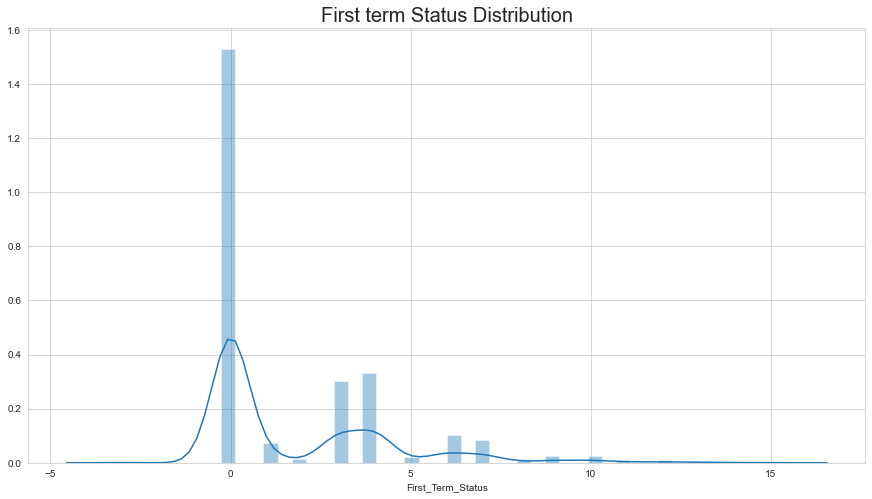

In [85]:
# Creating new feature column from FIRST_TERM_ATTEMPT_HRS and FIRST_TERM_EARNED_HRS column
attrition_1['First_Term_Status']=attrition_1['FIRST_TERM_ATTEMPT_HRS']-attrition_1['FIRST_TERM_EARNED_HRS']
plt.figure(figsize=(15,8))
sns.distplot(attrition_1['First_Term_Status'])
plt.title('First term Status Distribution',fontdict={'fontsize':20})
plt.show()

Negative value in First_Term_Status column makes no sense therefore must be made 0

In [86]:
# Dealing with negative value in First_Term_Status column
index=attrition_1[attrition_1['First_Term_Status']<0].index.tolist()
attrition_1.loc[index,'First_Term_Status']=0

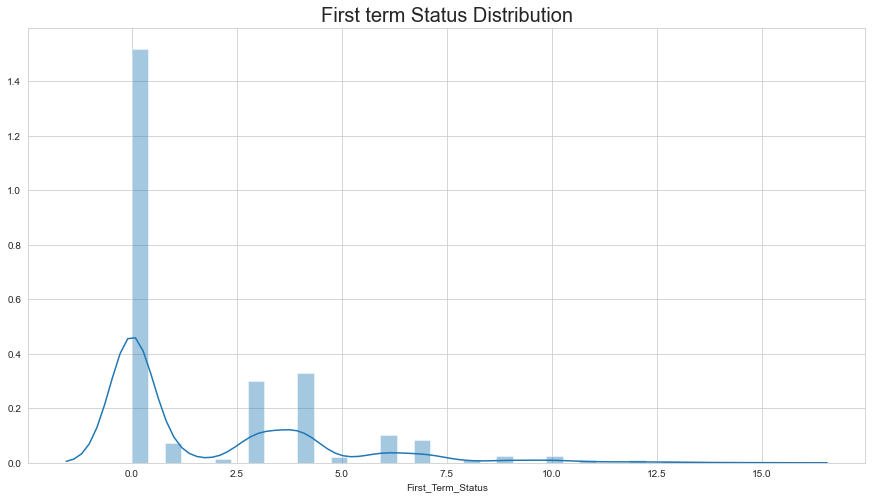

In [87]:
plt.figure(figsize=(15,8))
sns.distplot(attrition_1['First_Term_Status'])
plt.title('First term Status Distribution',fontdict={'fontsize':20})
plt.show()

In [88]:
# Creating new feature column from SECOND_TERM_ATTEMPT_HRS and SECOND_TERM_EARNED_HRS column
# Also Dealing with negative value in Second_Term_Status column
attrition_1['Second_Term_Status']=attrition_1['SECOND_TERM_ATTEMPT_HRS']-attrition_1['SECOND_TERM_EARNED_HRS']
index=attrition_1[attrition_1['Second_Term_Status']<0].index.tolist()
attrition_1.loc[index,'Second_Term_Status']=0

In [89]:
attrition_1['Second_Term_Status'].unique()

array([ 0.,  3.,  4.,  2.,  1.,  5.,  8., nan,  6.,  7., 10.,  9., 11.,
       12., 13., 16., 15., 14.])

In [90]:
# Dealing with missing values in First_Term_Status and Second_Term_Status columns 
# Also encoding with string: Not Complete,Complete,Not Attend
def Status(x):
    if x>0:
        return 'Not Complete'
    elif x==0:
        return 'Complete'
    else:
        return 'Not Attempt'
    
attrition_1['Second_Term_Status']=attrition_1['Second_Term_Status'].apply(Status)
attrition_1['First_Term_Status']=attrition_1['First_Term_Status'].apply(Status)

In [91]:
# Pivot table showing Number of student in differnt category
perf_stat0=pd.pivot_table(index=['DEGREE_GROUP_DESC','First_Term_Status','Second_Term_Status'],
                         columns='RETURNED_2ND_YR',
                         values='STDNT_AGE',
                         aggfunc=np.count_nonzero,
                         data=attrition_1)
perf_stat0

RETURNED_2ND_YR                                             0       1
DEGREE_GROUP_DESC First_Term_Status Second_Term_Status               
Associate         Complete          Complete              NaN     7.0
                                    Not Complete          NaN     1.0
                  Not Complete      Complete              NaN     1.0
                                    Not Complete          2.0     1.0
Bachelors         Complete          Complete            217.0  1153.0
                                    Not Attempt          89.0    12.0
                                    Not Complete        104.0   454.0
                  Not Complete      Complete             82.0   492.0
                                    Not Attempt          90.0    18.0
                                    Not Complete        138.0   535.0
Career Associate  Complete          Complete              1.0     2.0
                  Not Complete      Not Complete          NaN     1.0

In [92]:
fig=perf_stat0.iplot(kind='bar')

#### Takeaway

+ Bachelors student are more in number than associate and least is career associate.
+ Bachelors student who have completed any one of the terms are more likely to show up for second year.
+ Bachelors student who not attempt second term are more likely not to show up for second year.

In [93]:
# Replacing 'No Information' with 'Other/Unknown' in FATHER_HI_EDU_DESC column
attrition_1['FATHER_HI_EDU_DESC'].replace('No Information','Other/Unknown',inplace=True)

In [94]:
# Replacing 'No Information' with 'Other/Unknown' in MOTHER_HI_EDU_DESC column
attrition_1['MOTHER_HI_EDU_DESC'].replace('No Information','Other/Unknown',inplace=True)

In [95]:
attrition_1[['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','UNMET_NEED','COST_OF_ATTEND']].head(30)

,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED,COST_OF_ATTEND
0,0,0,0.0,0
1,570000,785760,459300.0,1355760
2,0,0,0.0,0
3,0,0,0.0,0
4,835920,519840,278340.0,1355760
5,0,0,0.0,0
6,0,0,0.0,0
7,0,0,0.0,0
8,0,0,0.0,0
9,0,0,0.0,0


#### Takeaway
+ Values in GROSS_FIN_NEED column is the difference between EST_FAM_CONTRIBUTION and COST_OF_ATTEND column
+ Values in GROSS_FIN_NEED column is either equal to or greater than UNMET_NEED column
+ Conclusion: keeping only EST_FAM_CONTRIBUTION and COST_OF_ATTEND columns

In [96]:
attrition_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STDNT_AGE                 3400 non-null   int64  
 1   STDNT_GENDER              3400 non-null   object 
 2   STDNT_BACKGROUND          3400 non-null   object 
 3   IN_STATE_FLAG             3400 non-null   object 
 4   INTERNATIONAL_STS         3400 non-null   object 
 5   HOUSING_STS               3400 non-null   object 
 6   HIGH_SCHL_GPA             3400 non-null   float64
 7   STDNT_TEST_ENTRANCE_COMB  3400 non-null   float64
 8   DEGREE_GROUP_DESC         3400 non-null   object 
 9   STDNT_MAJOR               3400 non-null   object 
 10  FIRST_TERM_ATTEMPT_HRS    3400 non-null   int64  
 11  FIRST_TERM_EARNED_HRS     3400 non-null   int64  
 12  SECOND_TERM_ATTEMPT_HRS   3194 non-null   float64
 13  SECOND_TERM_EARNED_HRS    3191 non-null   float64
 14  FATHER_H

In [97]:
attrition_1['STDNT_MAJOR'].nunique()

54

In [98]:
attrition_1['STDNT_MAJOR'].unique()

array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
       'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
       'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
       'Early Childhood Education', 'Music Performance',
       'English Language/Literature', 'Joint Enrollment - Accel',
       'History and Secondary Ed', 'History', 'Engineering Studies',
       'Computer Science - Systems', 'Pre-Business', 'Management',
       'Theatre Education', 'Marketing', 'Communication',
       'Music Education', 'French with Teacher Cert',
       'English and Secondary Ed', 'Exercise Science', 'General Business',
       'Mathematics and Secondary Ed', 'Finance', 'French',
       'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
       'Middle Grades Education', 'Geology',
       'Management Information Systems', 'Art Education',
       'Applied Computer Science', 'Information Technology', 'Sociology',
       'Computer Science - Games',

In [99]:
attrition_1['STDNT_MAJOR'].value_counts()

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
Engineering Studies                60
English Language/Literature        60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [100]:
# Replacing those categorical variable name whose number of counts are less than 80 with 'Miscellaneous' in STDNT_MAJOR column
list=['Undeclared', 'Mathematics', 'Art', 'Political Science','Accounting','Chemistry', 'Pre-Engineering/RETP',
      'English Language/Literature', 'Joint Enrollment - Accel','History and Secondary Ed', 'History', 'Engineering Studies',
      'Computer Science - Systems','Management','Theatre Education', 'Marketing', 'Communication','French with Teacher Cert',
      'English and Secondary Ed','Mathematics and Secondary Ed', 'Finance', 'French','Health Science',
      'Spec Ed: Gen. Curr. - Reading', 'Music','Middle Grades Education', 'Geology','Management Information Systems',
      'Art Education','Applied Computer Science', 'Information Technology', 'Sociology','Computer Science - Games',
      'Spanish', 'General Studies/AS','Biology and Secondary Ed', 'Chemistry and Secondary Ed','Health and Physical Education',
      'Liberal Arts','Spanish with Teacher Cert', 'Earth and Space Science','Early Admission - Accel']

attrition_1['STDNT_MAJOR'].replace(list,'Miscellaneous',inplace=True)
attrition_1['STDNT_MAJOR'].value_counts()

Miscellaneous                1629
Biology                       362
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Psychology                    155
Pre-Business                  133
Theatre Arts                  131
Music Performance              99
Criminal Justice               98
Music Education                96
General Business               85
Exercise Science               81
Name: STDNT_MAJOR, dtype: int64

In [101]:
attrition_1.columns
attrition_1.to_csv('attrition_1.csv')

In [102]:
# droping irrelevant column
attrition_1.drop(['FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
                  'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS',
                 'GROSS_FIN_NEED','UNMET_NEED'],axis=1,inplace=True)

In [103]:
attrition_1.shape

(3400, 17)

In [104]:
# Applying the get_dummies method
attrition_final=pd.get_dummies(attrition_1)

In [105]:
attrition_final.shape

(3400, 51)

# 3. Cross Validation

#### Model Testing
+ Random Forest Classifier
+ Gradient Boosting Classifier
+ XGB Classifier
+ Logistic Regression

In [106]:
# Separating target column
X=attrition_final.drop('RETURNED_2ND_YR',axis=1)
y=attrition_final['RETURNED_2ND_YR']

In [111]:
# Model testing based on accuracy score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
print('Random Forest Classifier :',cross_val_score(rf_clf,X,y,cv=10,scoring='accuracy').mean())

gb_clf=GradientBoostingClassifier(n_estimators=50)
print('Gradient Boosting Classifier :',cross_val_score(gb_clf,X,y,cv=10,scoring='accuracy').mean())

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
print('Logistic Regression :',cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean())


from xgboost import XGBClassifier
xgb_clf=XGBClassifier(n_estimators=50)
print('XGB Classifier :',cross_val_score(xgb_clf,X,y,cv=10,scoring='accuracy').mean())



Random Forest Classifier : 0.8211764705882352
Gradient Boosting Classifier : 0.826764705882353
Logistic Regression : 0.7873529411764706
XGB Classifier : 0.8102941176470588


#### Takeaway

Since 'Gradient Boosting Classifier' accuracy score is highest.
Therefore choose Gradient Boosting algorithm to build machine learning model

# 4. Implementing Machine Learning Models


## 4.1 Machine Learning Model : Gradient Boosting Classifier

In [112]:
# Splitting Data into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [113]:
# Model building, fitting and predicting
gb_clf=GradientBoostingClassifier(n_estimators=50,random_state=21)
gb_clf.fit(X_train,y_train)
pred_1=gb_clf.predict(X_test)

In [114]:
# Weights given to features
feature_importances_1=pd.DataFrame(X.columns)
feature_importances_1['feature_importances_1']=gb_clf.feature_importances_
feature_importances_1.rename(columns={0:'attributes_1'},inplace=True)
feature_importances_1.sort_values(by='feature_importances_1',ascending=False)
# Heigher the weights more important features

,attributes_1,feature_importances_1
48,Second_Term_Status_Not Attempt,0.657816
1,HIGH_SCHL_GPA,0.048111
0,STDNT_AGE,0.032910
4,EST_FAM_CONTRIBUTION,0.031875
2,STDNT_TEST_ENTRANCE_COMB,0.028396
3,COST_OF_ATTEND,0.022914
20,HOUSING_STS_On Campus,0.016973
9,STDNT_BACKGROUND_BGD 3,0.012588
35,STDNT_MAJOR_Psychology,0.011560
10,STDNT_BACKGROUND_BGD 4,0.010994


In [115]:
# Visualising features importance
feature_importances_1.sort_values(by='feature_importances_1',
                                  ascending=False).iplot(kind='scatter',
                                                         x='attributes_1',
                                                         y='feature_importances_1',mode='markers')

In [116]:
# Test score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('R square value :',gb_clf.score(X_train,y_train))
print('accuracy_score :',accuracy_score(y_test,pred_1),'\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,pred_1),'\n')
print('Classification report :','\n',classification_report(y_test,pred_1))

R square value : 0.8333333333333334
accuracy_score : 0.84 

Confusion_matrix : 
 [[ 46 129]
 [  7 668]] 

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.26      0.40       175
           1       0.84      0.99      0.91       675

    accuracy                           0.84       850
   macro avg       0.85      0.63      0.66       850
weighted avg       0.84      0.84      0.80       850



#### Takeaway
+ 83% of the variability is explained 
+ accuracy score is very good 
+ very less false positive case as compare to false negative case

## 4.2 Tuning Hyper parameters

In [117]:
# Calling GridSearchCV
from sklearn.model_selection import GridSearchCV

In [118]:
# Initialising Hyper parameters
param_grid=dict(n_estimators=np.arange(140,160,1),
                subsample=np.arange(0.7,0.8,0.01),
                min_samples_split=[2,3,4],
                max_depth=[3,4],
               max_features=['sqrt','log'])
param_grid

{'n_estimators': array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159]),
 'subsample': array([0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ]),
 'min_samples_split': [2, 3, 4],
 'max_depth': [3, 4],
 'max_features': ['sqrt', 'log']}

In [119]:
# Model building
gb_clf=GradientBoostingClassifier(random_state=21)
grid_search=GridSearchCV(estimator=gb_clf,param_grid=param_grid,n_jobs=-1)

In [120]:
# Model Fitting
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'max_features': ['sqrt', 'log'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159]),
                         'subsample': array([0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ])})

In [121]:
# Best parameters
grid_search.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 142,
 'subsample': 0.75}

In [122]:
# Rebuilding the model using best parameters
gb_clf=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=3,max_features='sqrt',
                           n_estimators=142,random_state=21, subsample=0.75)
gb_clf.fit(X_train,y_train)
pred_1=gb_clf.predict(X_test)

In [123]:
# Weights given to features
feature_importances_2=pd.DataFrame(X.columns)
feature_importances_2['feature_importances_2']=gb_clf.feature_importances_
feature_importances_2.rename(columns={0:'attributes_2'},inplace=True)
feature_importances_2.sort_values(by='feature_importances_2',ascending=False)
# Heigher the weights more important features

,attributes_2,feature_importances_2
48,Second_Term_Status_Not Attempt,0.369759
1,HIGH_SCHL_GPA,0.077644
47,Second_Term_Status_Complete,0.059798
3,COST_OF_ATTEND,0.058812
2,STDNT_TEST_ENTRANCE_COMB,0.041785
4,EST_FAM_CONTRIBUTION,0.039209
49,Second_Term_Status_Not Complete,0.038379
0,STDNT_AGE,0.032399
9,STDNT_BACKGROUND_BGD 3,0.018638
35,STDNT_MAJOR_Psychology,0.012990


In [124]:
# Visualisation of important features
feature_importances_2.sort_values(by='feature_importances_2',
                                  ascending=False).iplot(kind='scatter',
                                                         x='attributes_2',
                                                         y='feature_importances_2',color='purple',mode='markers')

In [125]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('R square value :',gb_clf.score(X_train,y_train))
print('accuracy_score :',accuracy_score(y_test,pred_1),'\n')
print('Confusion_matrix :','\n',confusion_matrix(y_test,pred_1),'\n')
print('Classification report :','\n',classification_report(y_test,pred_1))

R square value : 0.84
accuracy_score : 0.8388235294117647 

Confusion_matrix : 
 [[ 48 127]
 [ 10 665]] 

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.27      0.41       175
           1       0.84      0.99      0.91       675

    accuracy                           0.84       850
   macro avg       0.83      0.63      0.66       850
weighted avg       0.84      0.84      0.80       850



#### Takeaway
This tuned model gives more r square values than the previous one hence capable of explaining more variability of the dataset. 
The accuracy score is slightly lower, Thus preventing from overfitting.

In [126]:
# Comparision betweens 2 models based on weightage given to each features
compare=pd.concat([feature_importances_1,feature_importances_2],axis=1)
compare.sort_values(by='feature_importances_2',ascending=False)

,attributes_1,feature_importances_1,attributes_2,feature_importances_2
48,Second_Term_Status_Not Attempt,0.657816,Second_Term_Status_Not Attempt,0.369759
1,HIGH_SCHL_GPA,0.048111,HIGH_SCHL_GPA,0.077644
47,Second_Term_Status_Complete,0.007094,Second_Term_Status_Complete,0.059798
3,COST_OF_ATTEND,0.022914,COST_OF_ATTEND,0.058812
2,STDNT_TEST_ENTRANCE_COMB,0.028396,STDNT_TEST_ENTRANCE_COMB,0.041785
4,EST_FAM_CONTRIBUTION,0.031875,EST_FAM_CONTRIBUTION,0.039209
49,Second_Term_Status_Not Complete,0.005133,Second_Term_Status_Not Complete,0.038379
0,STDNT_AGE,0.032910,STDNT_AGE,0.032399
9,STDNT_BACKGROUND_BGD 3,0.012588,STDNT_BACKGROUND_BGD 3,0.018638
35,STDNT_MAJOR_Psychology,0.011560,STDNT_MAJOR_Psychology,0.012990


In [127]:
compare.sort_values(by='feature_importances_2',ascending=False).iplot(kind='scatter',
                                                                      x=['attributes_1','attributes_2'],
                                                                      y=['feature_importances_1','feature_importances_2'],
                                                                      mode='markers')

It is clearly visible that weightage is more distributed on lateral model, 
Thus not focusing more on some features, rather than depending on various features.

# 5. Conclusion

+ We have constructed a very simple pipeline of predicting student attrition, from some basic Exploratory Data Analysis to       feature engineering as well as implementing machine learning models in the form of a Gradient boosting classifier and tuning   it to get the best result. This whole notebook takes some time to run but returns a 84% accuracy in its predictions.

+ Those student who did not attempt or not completed second term are more prone to leave the university and those who completed   will return for second year
+ Student with high GPA as well as high test entrance score are more interested in further study 
+ Some of the course fee are high as student are leaving because of less family contribution 
+ Student age also matter as most of the student are of 18 years old

In [128]:
attrition_1['STDNT_MAJOR'].value_counts()

Miscellaneous                1629
Biology                       362
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Psychology                    155
Pre-Business                  133
Theatre Arts                  131
Music Performance              99
Criminal Justice               98
Music Education                96
General Business               85
Exercise Science               81
Name: STDNT_MAJOR, dtype: int64

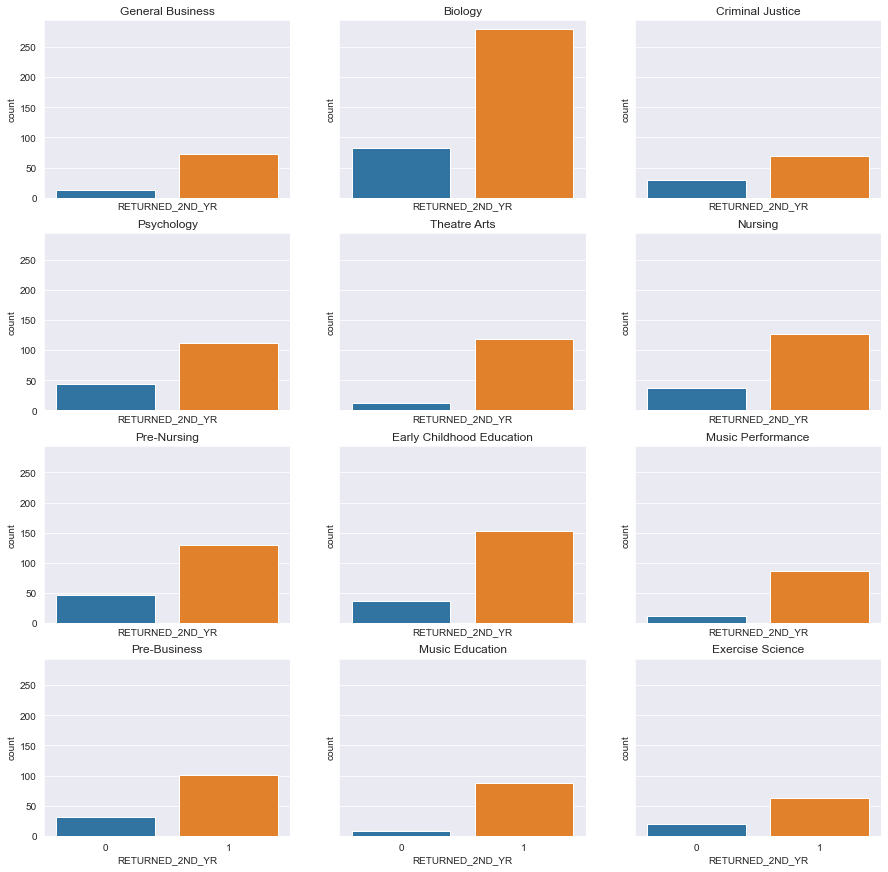

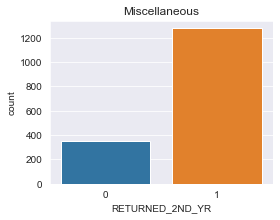

In [129]:
# Visualisation of student's Major subject against whether they returned for second year
sns.set_style('darkgrid')
fig1,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,15),sharex=True,sharey=True)

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='General Business']['RETURNED_2ND_YR'],ax=axes[0,0])
axes[0,0].set_title('General Business')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Biology']['RETURNED_2ND_YR'],ax=axes[0,1])
axes[0,1].set_title('Biology')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Criminal Justice']['RETURNED_2ND_YR'],ax=axes[0,2])
axes[0,2].set_title('Criminal Justice')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Psychology']['RETURNED_2ND_YR'],ax=axes[1,0])
axes[1,0].set_title('Psychology')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Theatre Arts']['RETURNED_2ND_YR'],ax=axes[1,1])
axes[1,1].set_title('Theatre Arts')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Nursing']['RETURNED_2ND_YR'],ax=axes[1,2])
axes[1,2].set_title('Nursing')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Pre-Nursing']['RETURNED_2ND_YR'],ax=axes[2,0])
axes[2,0].set_title('Pre-Nursing')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Early Childhood Education']['RETURNED_2ND_YR'],ax=axes[2,1])
axes[2,1].set_title('Early Childhood Education')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Music Performance']['RETURNED_2ND_YR'],ax=axes[2,2])
axes[2,2].set_title('Music Performance')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Pre-Business']['RETURNED_2ND_YR'],ax=axes[3,0])
axes[3,0].set_title('Pre-Business')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Music Education']['RETURNED_2ND_YR'],ax=axes[3,1])
axes[3,1].set_title('Music Education')

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Exercise Science']['RETURNED_2ND_YR'],ax=axes[3,2])
axes[3,2].set_title('Exercise Science')

fig2,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,3))

sns.countplot(attrition_1[attrition_1['STDNT_MAJOR']=='Miscellaneous']['RETURNED_2ND_YR'],ax=axes)
axes.set_title('Miscellaneous')

plt.show()

In [130]:
# Construction of table to see the fraction based on student's major subject
pivot_table=pd.pivot_table(index='STDNT_MAJOR',columns='RETURNED_2ND_YR',
                           data=attrition_1,values='STDNT_GENDER',aggfunc=np.count_nonzero)

fraction=pd.DataFrame(pivot_table)
fraction.reset_index(inplace=True)
fraction.rename(columns={0:'Not_Returned',1:'Returned'},inplace=True)

def ratio(x,y):
    return x/(x+y)

fraction['fraction_not_returned']=fraction.apply(lambda i : round(ratio(i['Not_Returned'],i['Returned']),2),axis=1)
fraction['fraction_returned']=fraction.apply(lambda i : round(ratio(i['Returned'],i['Not_Returned']),2),axis=1)

fraction

RETURNED_2ND_YR,STDNT_MAJOR,Not_Returned,Returned,fraction_not_returned,fraction_returned
0,Biology,82,280,0.23,0.77
1,Criminal Justice,29,69,0.30,0.70
2,Early Childhood Education,37,153,0.19,0.81
3,Exercise Science,19,62,0.23,0.77
4,General Business,12,73,0.14,0.86
5,Miscellaneous,353,1276,0.22,0.78
6,Music Education,8,88,0.08,0.92
7,Music Performance,12,87,0.12,0.88
8,Nursing,37,127,0.23,0.77
9,Pre-Business,32,101,0.24,0.76


In [131]:
# Visualisation of the calculated fraction 
fraction.iplot(kind='scatter',x='STDNT_MAJOR',y=['fraction_not_returned','fraction_returned'])

+ There are lots of Major subject where fraction ratio of not returning for second year is greater than 0.2.
Thats mean out of   100 student in particular subject 20 student will not show up in second year and this is bad.

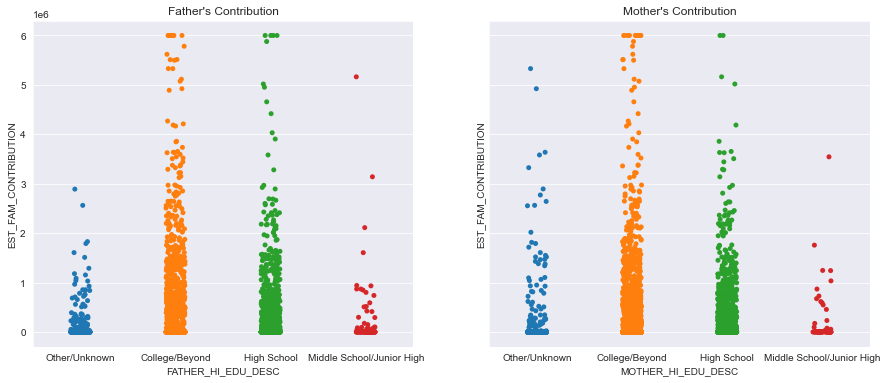

In [132]:
# Parent's Contribution based on their education level
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(15,6),sharey=True)
sns.set_style('whitegrid')

g=sns.stripplot(x='FATHER_HI_EDU_DESC',y='EST_FAM_CONTRIBUTION',data=attrition_1,size=5,ax=axes[0])
axes[0].set_title("Father's Contribution")

h=sns.stripplot(x='MOTHER_HI_EDU_DESC',y='EST_FAM_CONTRIBUTION',data=attrition_1,size=5,ax=axes[1])
axes[1].set_title("Mother's Contribution")

fig1=g.get_figure()
fig1.savefig("plot2.png")
fig2=h.get_figure()
fig2.savefig("plot3.png")
plt.show()

+ Parents with higher education level are supporting their son/daughter more financially.This is not the case for less           educated parents 

# Logistic Regression Model

In [133]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [134]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [135]:
print(Score)

0.7941176470588235


In [136]:
print(Report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.79      1.00      0.89       675

    accuracy                           0.79       850
   macro avg       0.40      0.50      0.44       850
weighted avg       0.63      0.79      0.70       850

